# 1

#### A. Create a data frame called DataFrame1. It should contain data about five employees. Each employee data consists of employee number, name, salary, department number and designation. Add appropriate column names to the columns. Find the mean of the salary in the DataFrame1.

In [1]:
import pandas as pd
DataFrame1 = pd.DataFrame(
[[1,'hussain',10000,101,'FSD'],
 [2,'rahmath',10000,102,'DA'],
 [3,'sameer',10000,102,'FED'],
 [4,'owais',10000,103,'KBN'],
 [5,'awaiz',10000,101,'BED']],columns=("Eno","Ename",'Salary',"Deptno","Designation"))
print(DataFrame1.set_index('Eno'))
DataFrame1.Salary.mean()

       Ename  Salary  Deptno Designation
Eno                                     
1    hussain   10000     101         FSD
2    rahmath   10000     102          DA
3     sameer   10000     102         FED
4      owais   10000     103         KBN
5      awaiz   10000     101         BED


10000.0

#### B. Implement the Decision Tree algorithm on Diabetes dataset. Compare the results of using Gini Index and Entropy criterion for min_samples_split values of 20 and 30. Draw a color coded decision tree. Finally, demonstrate the prediction method using a new instance (The output should be the presence of diabetes ‘Yes’ or ‘No’).

Gini Index (min_samples_split=20) Accuracy: 0.7012987012987013
Gini index (min_samples_split=30) Accuracy: 0.7056277056277056
Entropy (min_samples_split=20) Accuracy: 0.7229437229437229
Entropy (min_samples_split=30) Accuracy: 0.7359307359307359


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Prediction for new instance: Yes
[1]


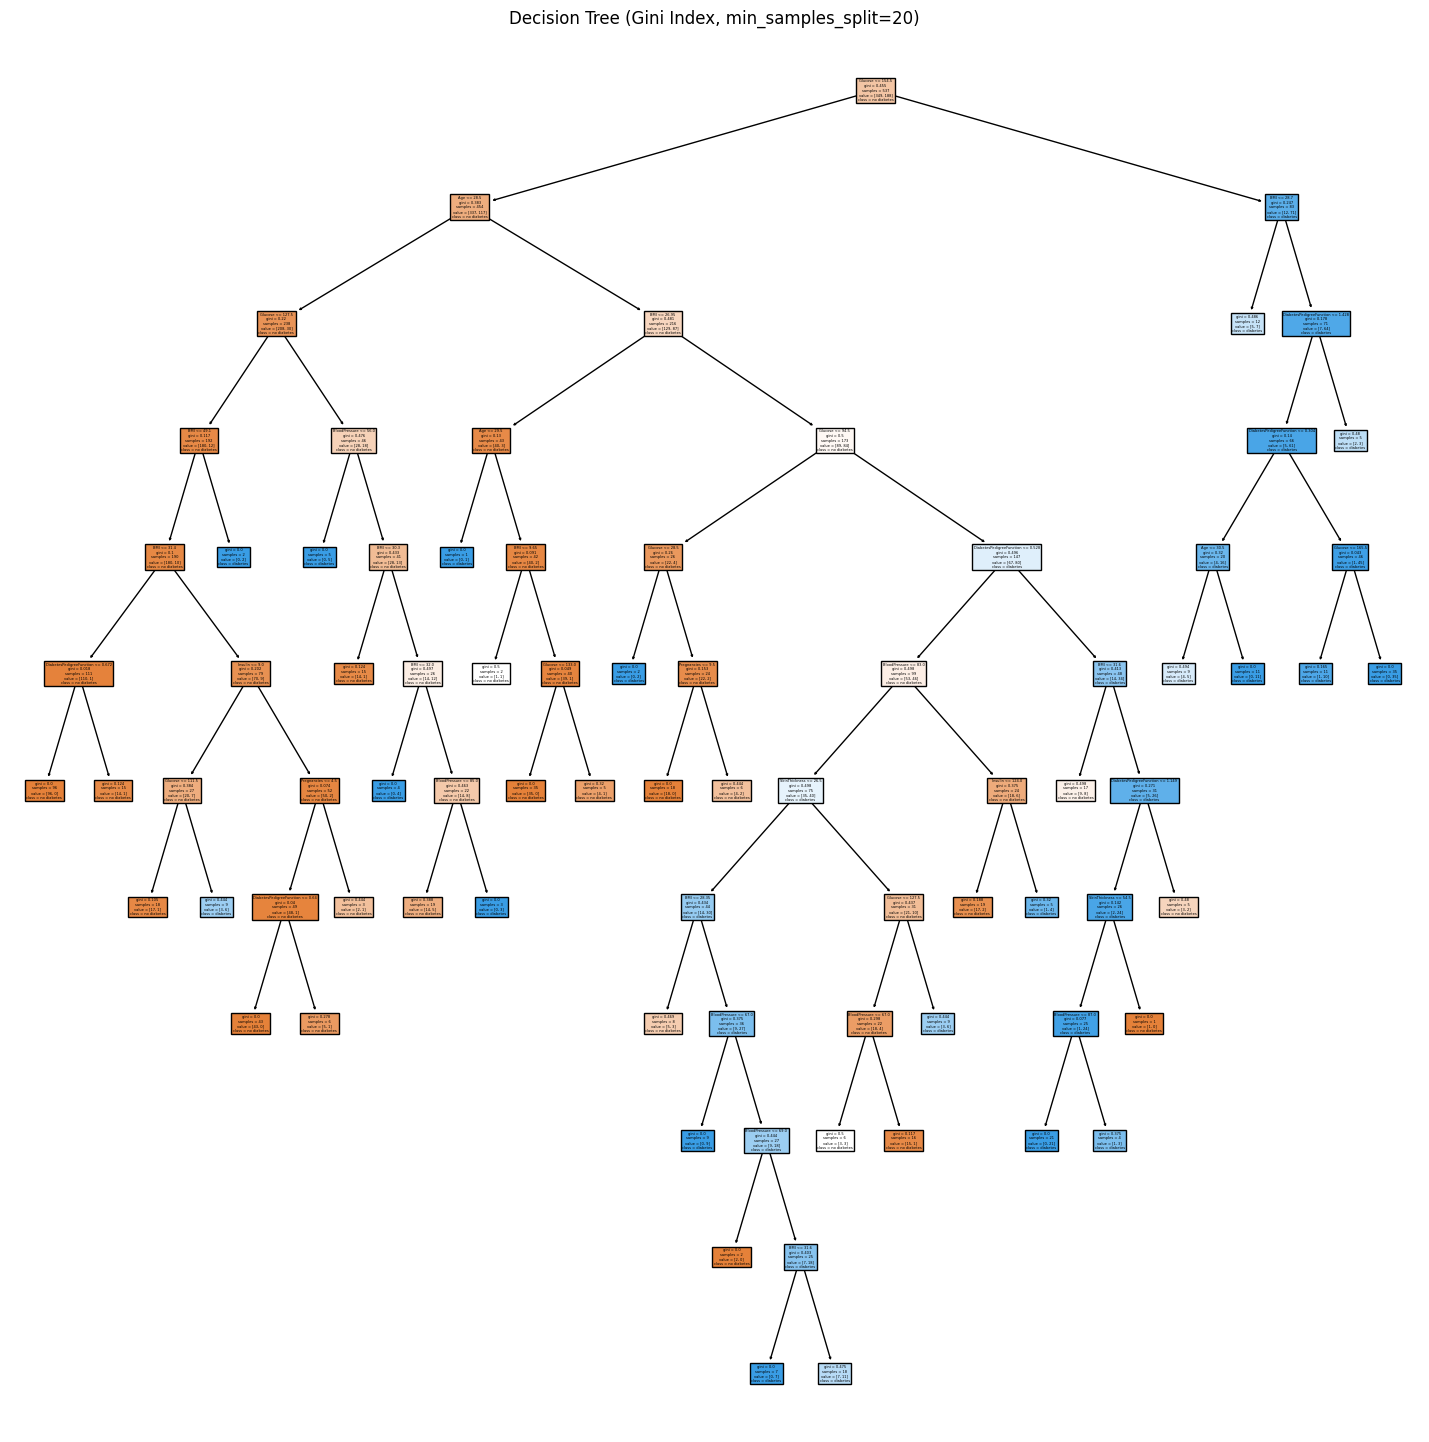

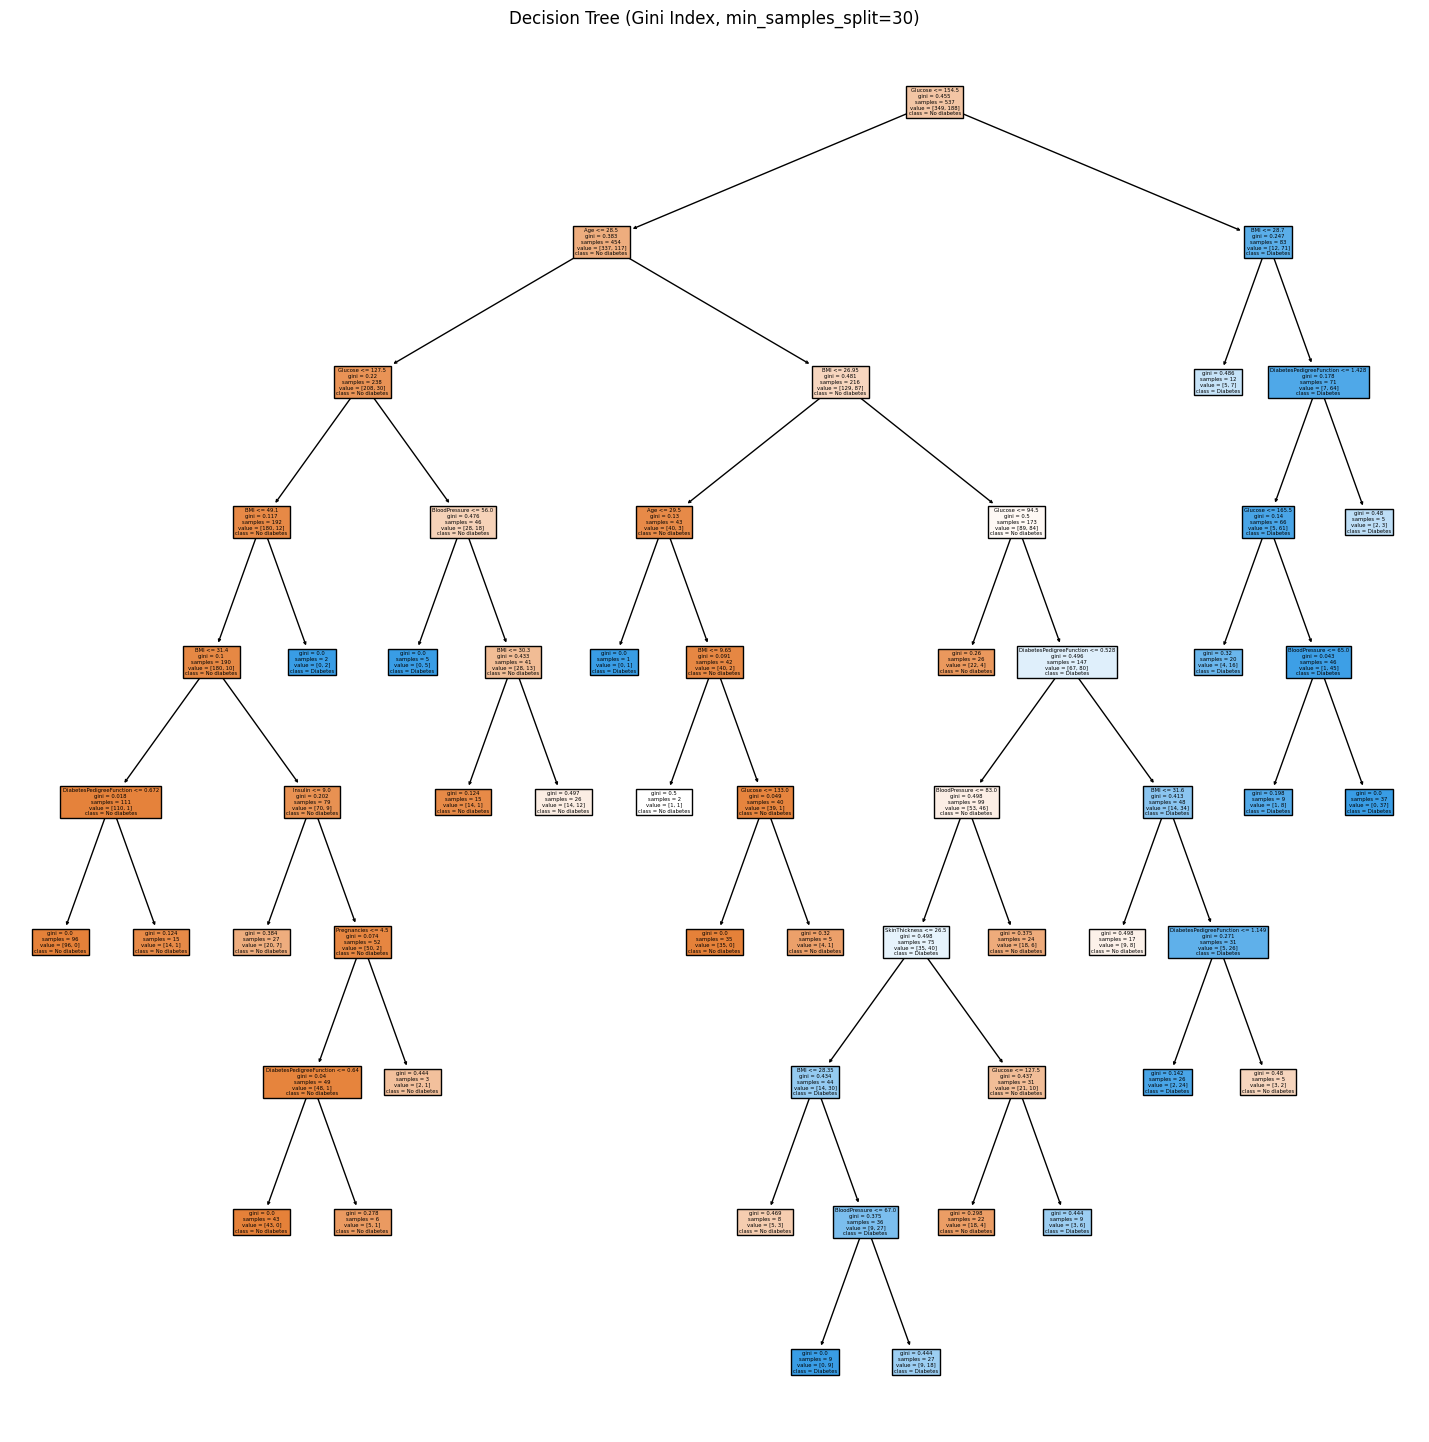

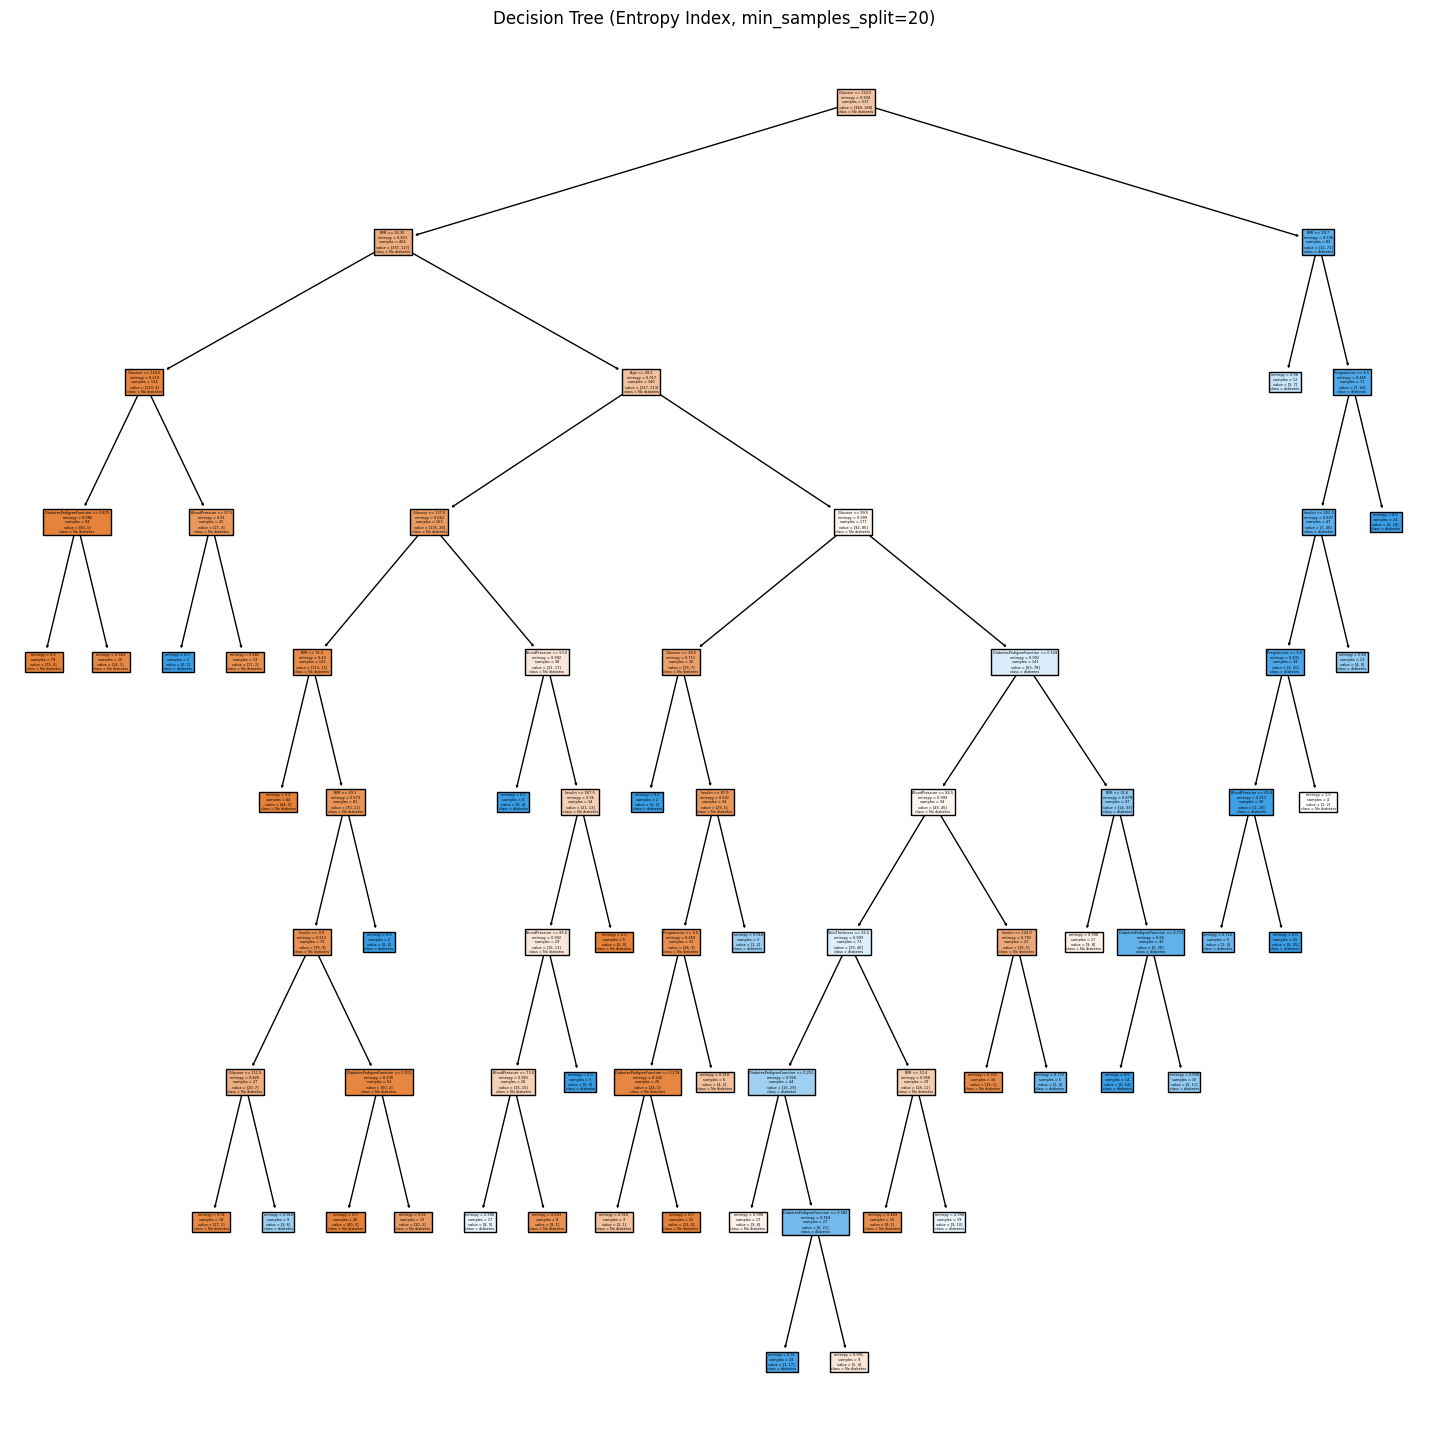

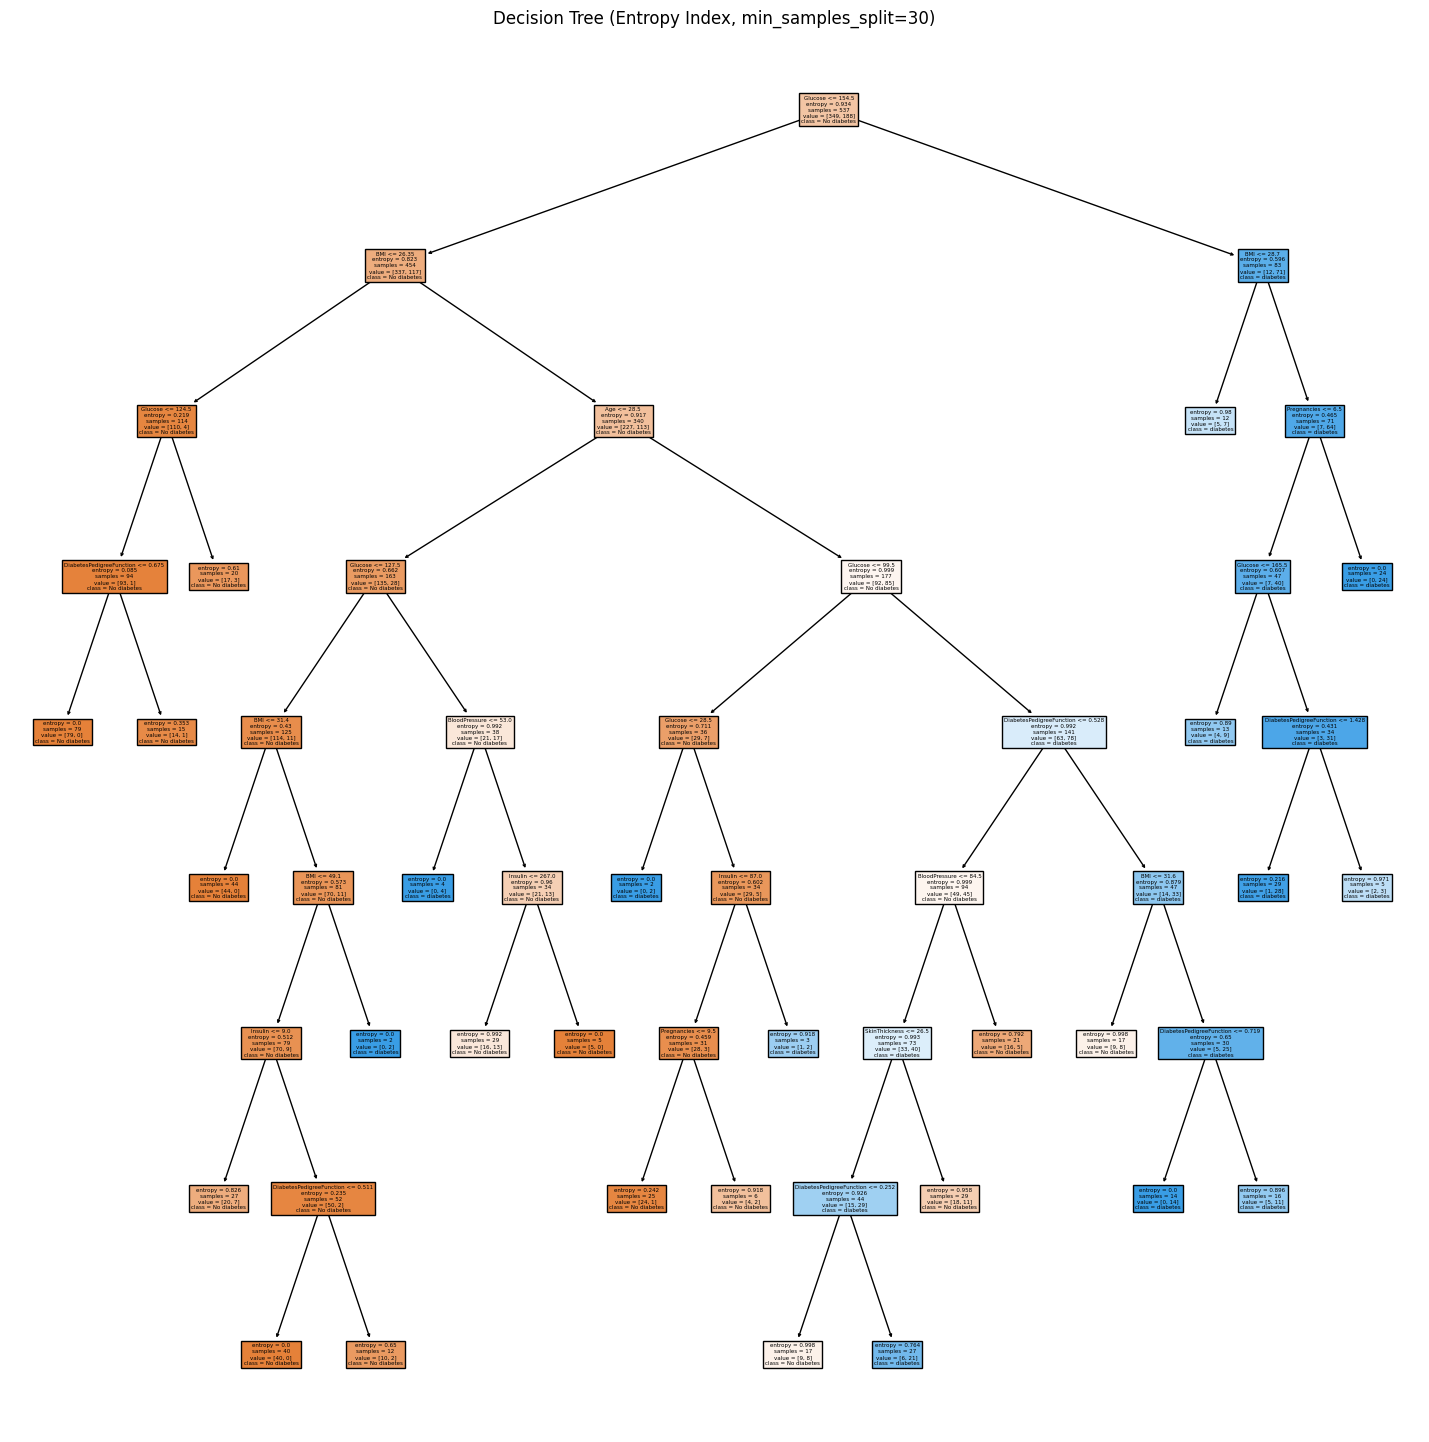

In [2]:

import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

db = pd.read_csv("diabetes.csv")
x = db.drop("Outcome", axis=1)
y = db['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

DC_gini_20 = DecisionTreeClassifier(criterion="gini",min_samples_split =20)
DC_gini_30 = DecisionTreeClassifier(criterion="gini",min_samples_split =30)
DC_entropy_20 = DecisionTreeClassifier(criterion="entropy",min_samples_split =20)
DC_entropy_30 = DecisionTreeClassifier(criterion="entropy",min_samples_split =30)

DC_gini_20.fit(x_train,y_train)
DC_gini_30.fit(x_train,y_train)
DC_entropy_20.fit(x_train,y_train)
DC_entropy_30.fit(x_train,y_train)

y_pred_g20 = DC_gini_20.predict(x_test) 
y_pred_g30 = DC_gini_30.predict(x_test)
y_pred_e20 = DC_entropy_20.predict(x_test)
y_pred_e30 = DC_entropy_30.predict(x_test)

print("Gini Index (min_samples_split=20) Accuracy:", metrics.accuracy_score(y_test, y_pred_g20))
print("Gini index (min_samples_split=30) Accuracy:", metrics.accuracy_score(y_test, y_pred_g30))
print("Entropy (min_samples_split=20) Accuracy:",metrics.accuracy_score(y_test,y_pred_e20))
print("Entropy (min_samples_split=30) Accuracy:",metrics.accuracy_score(y_test,y_pred_e30))

#set size of all 4 fig as 40x40
plt.figure(figsize=(40,40))
plt.subplot(2,2,1)
# filled lets the graph be filled with color
tree.plot_tree(DC_gini_20,feature_names=x.columns,class_names=["no diabetes","diabetes"],filled = True)
plt.title("Decision Tree (Gini Index, min_samples_split=20)")

plt.figure(figsize=(40,40))
plt.subplot(2,2,2)
tree.plot_tree(DC_gini_30,feature_names=x.columns,class_names=['No diabetes','Diabetes'],filled=True)
plt.title("Decision Tree (Gini Index, min_samples_split=30)")

plt.figure(figsize=(40,40))
plt.subplot(2,2,3)
tree.plot_tree(DC_entropy_20,feature_names=x.columns,class_names=['No diabetes','diabetes'],filled=True)
plt.title("Decision Tree (Entropy Index, min_samples_split=20)")

plt.figure(figsize=(40,40))
plt.subplot(2,2,4)
tree.plot_tree(DC_entropy_30,feature_names=x.columns,class_names=['No diabetes','diabetes'],filled=True)
plt.title("Decision Tree (Entropy Index, min_samples_split=30)")

new_instance=np.array([7, 150, 77, 37, 0, 35, 0.657, 60]).reshape(1,-1) #i.e 1 row and undefined columns
prediction = DC_entropy_30.predict(new_instance)
print("Prediction for new instance:", "Yes" if prediction == 1 else "No")
print(prediction)

# 2.

#### A. Create a data frame called DataFrame1. It should contain data about five employees. Each employee data consists of employee number, name, department number and designation. Add a new column called Address. In this new column, set the value as ‘Chennai’ for all the existing rows. Find the employees with the highest salary in each department.

In [3]:
import pandas as pd
DataFrame1 = pd.DataFrame([
    [1,'hussain',1002,100,'FSD'],
    [2,'awoiz',1001,102,'SAD'],
    [3,'sameer',10001,102,'FED'],
    [4,'owais',10004,103,'KBN'],
    [5,'awaiz',10005,101,'BED']
    ],
    columns=("Eno","Ename",'Salary',"Deptno","Designation")
)
DataFrame1["Address"]= "Chennai"
DataFrame1
highest_sal= DataFrame1.loc[DataFrame1.groupby('Deptno')['Salary'].idxmax()]
highest_sal

,Eno,Ename,Salary,Deptno,Designation,Address
0,1,hussain,1002,100,FSD,Chennai
4,5,awaiz,10005,101,BED,Chennai
2,3,sameer,10001,102,FED,Chennai
3,4,owais,10004,103,KBN,Chennai


#### B. Perform a detailed EDA (Exploratory DATA Analysis) on the Diabetes dataset. In particular, the output should contain correlation heat map and pair plots for all the features using the seaborn library. Draw a histogram for the BMI feature. Finally, draw a color coded Decision tree.

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classif
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy c
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

db = pd.read_csv('diabetes.csv')
x = db.drop('Outcome',axis=1)
y = db['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [5]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
 print(db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
db.duplicated().sum()

0

In [9]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

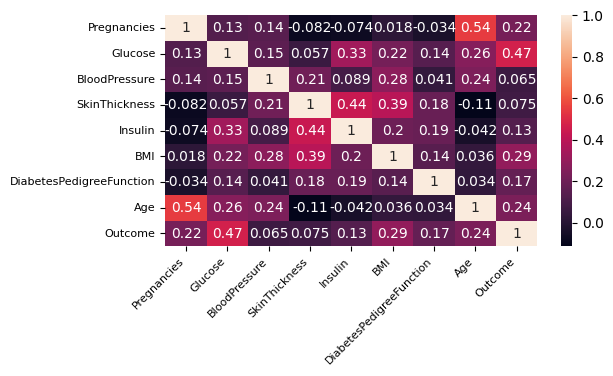

In [11]:
corr=db.corr()

plt.figure(figsize=(6,3))
ax = sns.heatmap(corr, annot=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

plt.show()

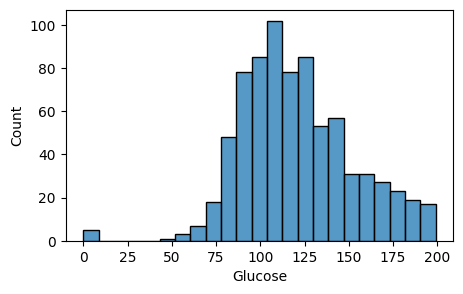

In [12]:
plt.figure(figsize=(5,3))
ax = sns.histplot(db["Glucose"])
plt.show()

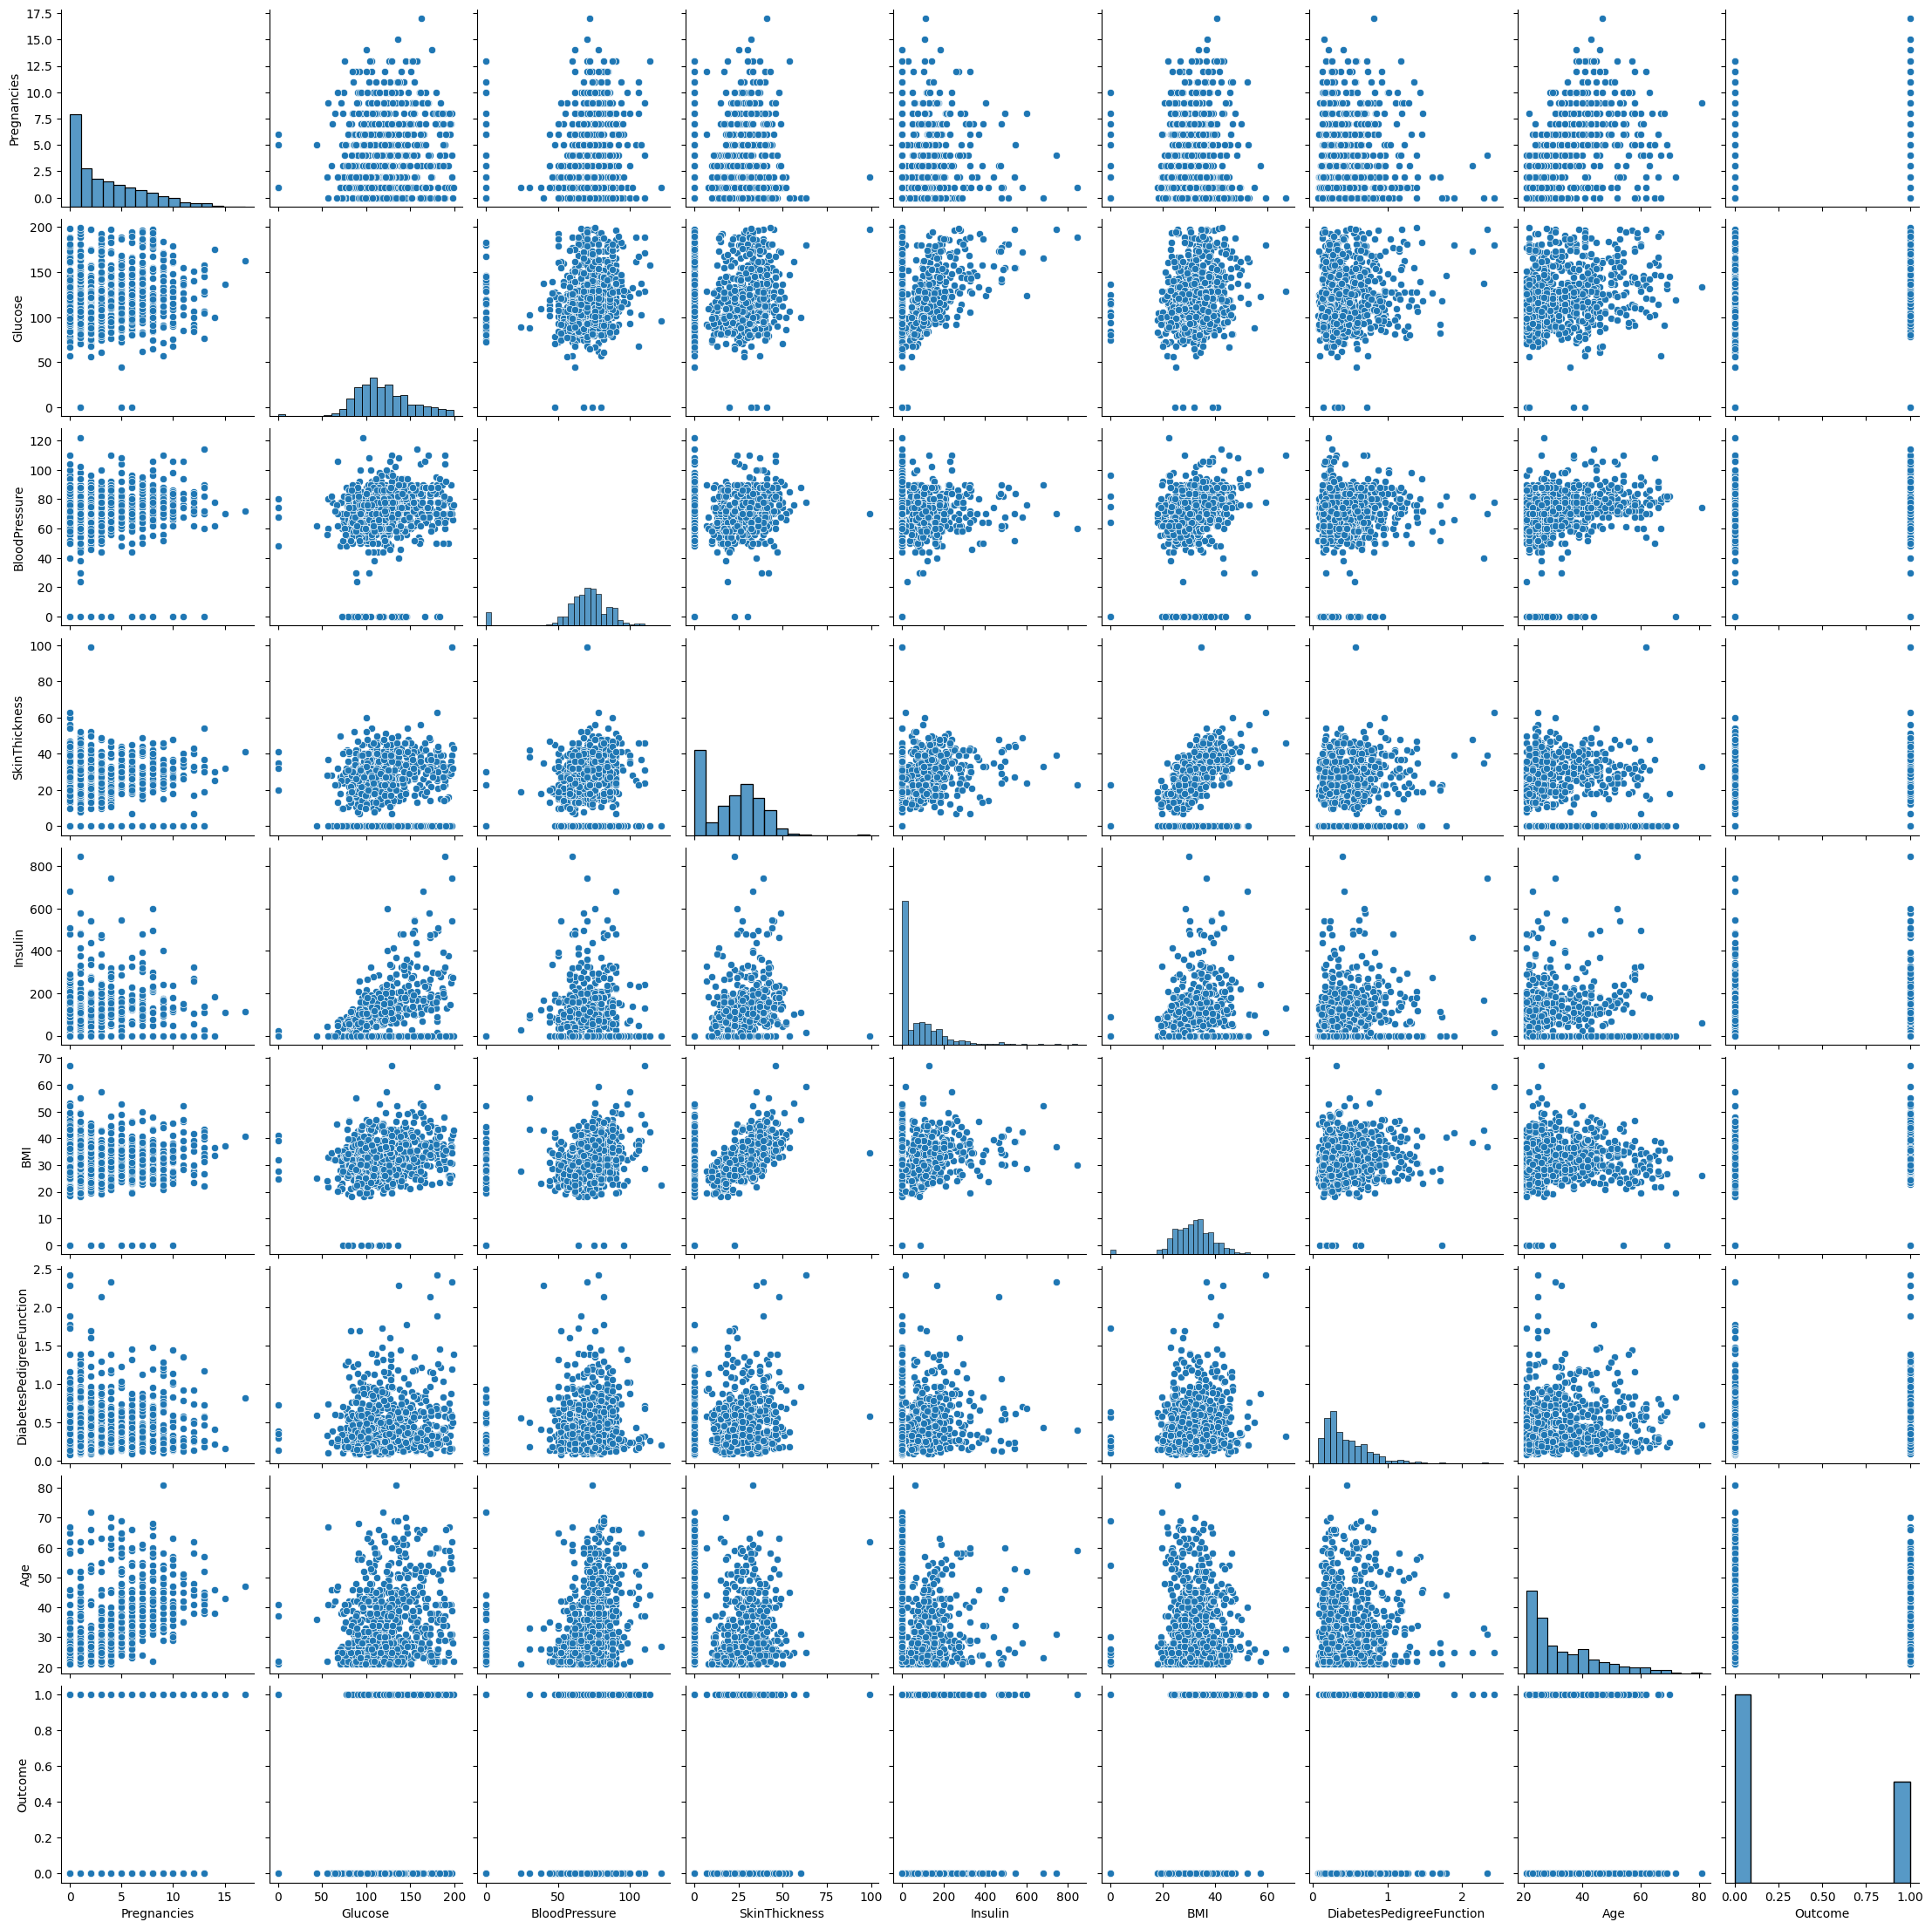

In [13]:
# to visualize how columns are related
sns.pairplot(db)

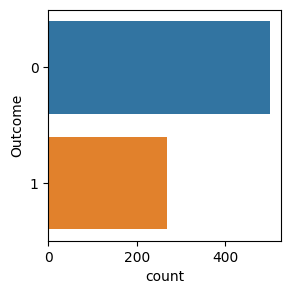

In [14]:
# distribution of the location
plt.figure(figsize=(3,3))
ax = sns.countplot(y="Outcome", data=db)

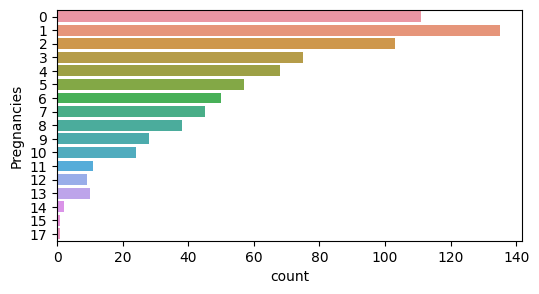

In [15]:
plt.figure(figsize=(6,3))
ax = sns.countplot(y="Pregnancies", data=db)

<AxesSubplot: xlabel='Age', ylabel='Glucose'>

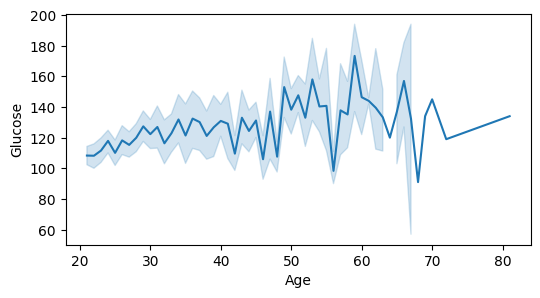

In [16]:
plt.figure(figsize=(6,3))
sns.lineplot(data=db, x="Age", y="Glucose")

In [17]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7186147186147186


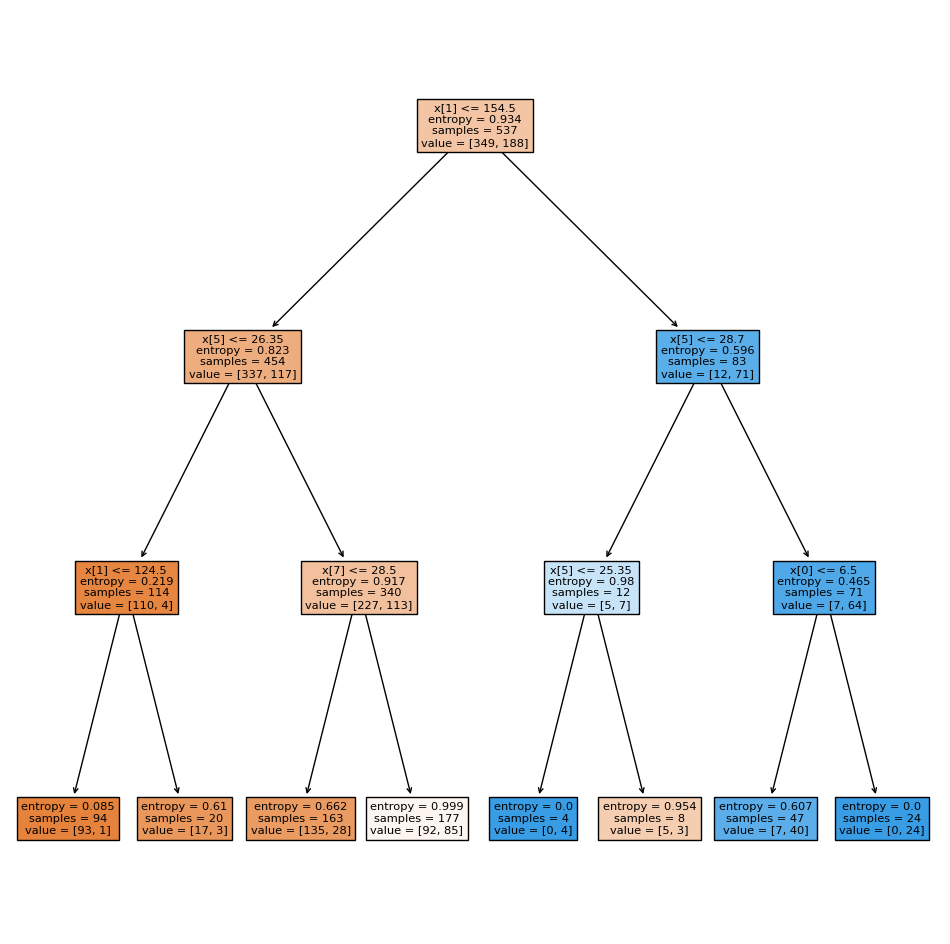

In [18]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf,filled = True)
plt.show()

# 3.

#### A. Create a data frame called DataFrame1. It should contain data about 10 employees. Each employee data consists of employee number, salary, address and designation. From DataFrame1 create a new data frame called DataFrame4. In DataFrame4, set the employee number as in-place index. Display data from 3rd row and 4th column using label-based, integer-based indexing and combination of label and integer indexing methods.

In [19]:
import pandas as pd
DataFrame1 = pd.DataFrame(
[[1,10500,'101','FSD'],
 [2,10005,'102','DA'],
 [3,13000,'102','FED'],
 [4,10055,'103','KBN'],
 [5,10400,'101','BED'],
 [6,12300,'101','FSD'],
 [7,10030,'102','DA'],
 [8,10050,'102','FED'],
 [9,13040,'103','KBN'],
 [10,15300,'101','BED']],columns=("Eno",'Salary',"Address","designation"))
DataFrame4 = DataFrame1.set_index('Eno')
DataFrame4

,Salary,Address,designation
Eno,,,
1,10500,101,FSD
2,10005,102,DA
3,13000,102,FED
4,10055,103,KBN
5,10400,101,BED
6,12300,101,FSD
7,10030,102,DA
8,10050,102,FED
9,13040,103,KBN


In [20]:
#Display data from the 3rd row and 4th column using label-based indexing
label_based = DataFrame4.loc[3, 'designation']

#Display data from the 3rd row and 4th column using integer-based indexing
integer_based = DataFrame4.iloc[2, 2]

#Display data from the 3rd row and 4th column using a combination of label and integer indexing
combination = DataFrame4.at[3,'designation'] #DataFrame4.at[3, 2]

#Print the results
print("Data from 3rd row and 4th column (label-based indexing):", label_based)
print("Data from 3rd row and 4th column (integer-based indexing):", integer_based)
print("Data from 3rd row and 4th column (combination of label and integer indexing):", combination)

Data from 3rd row and 4th column (label-based indexing): FED
Data from 3rd row and 4th column (integer-based indexing): FED
Data from 3rd row and 4th column (combination of label and integer indexing): FED


#### B. Implement the K-Means Clustering algorithm on the IRIS dataset. Use Petal Length and Petal Width features. Display the cluster labels and cluster centers. Draw a graph using matplotlib to show the clusters. Finally, display the cluster for a new instance (You must accept the values of the Petal Length and Petal Width from the user).

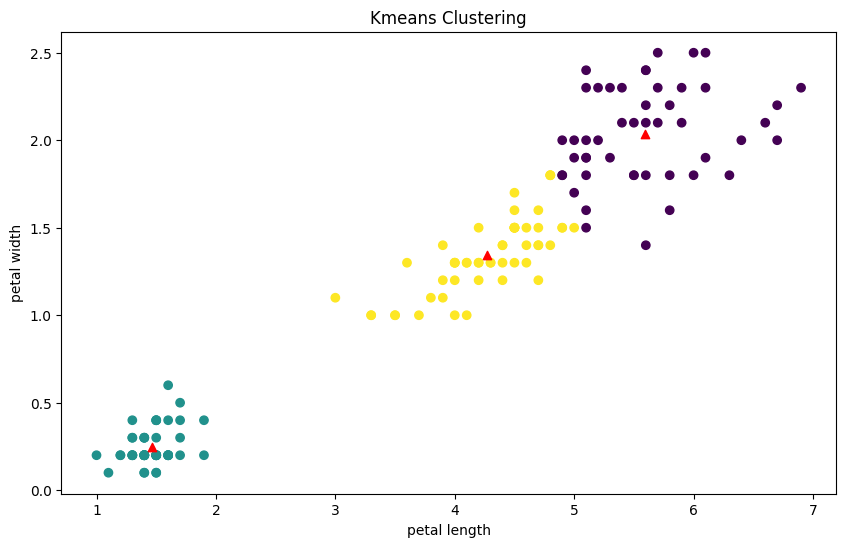

In [21]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
#Load the iris dataset
iris = load_iris()
X = iris.data[:,2:4]#We only take the first two features for visualization
#Create an instance of the KMeans algorithm
kmeans = KMeans(n_init=10,n_clusters = 3, random_state=42)
#Fit the algorithm to the data
kmeans.fit(X)
#Predict the cluster labels for the datapoints
labels = kmeans.labels_
#Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_
#Visualize the clusters
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c = 'red', marker='^')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Kmeans Clustering')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]

Cluster Centers:
[[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]


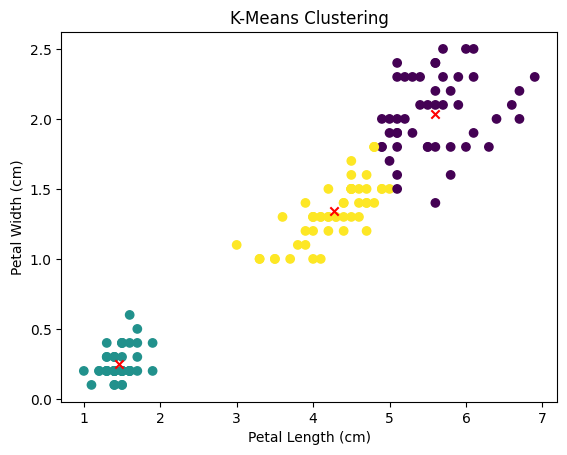

Enter the Petal Length (cm) for the new instance: 1.8
Enter the Petal Width (cm) for the new instance: 1.8
Cluster for the new instance: 1


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the IRIS dataset
iris = load_iris()

# Extract Petal Length and Petal Width features
X = iris.data[:,2:4]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Display cluster labels and cluster centers
print("Cluster Labels:")
print(cluster_labels)
print("\nCluster Centers:")
print(cluster_centers)

# Draw a graph to show the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clustering")
plt.show()

# Accept new instance values from the user
new_petal_length = float(input("Enter the Petal Length (cm) for the new instance: "))
new_petal_width = float(input("Enter the Petal Width (cm) for the new instance: "))

# Predict the cluster for the new instance
new_instance = np.array([[new_petal_length, new_petal_width]])
new_cluster = kmeans.predict(new_instance)

# Display the cluster for the new instance
print("Cluster for the new instance:", new_cluster[0])